# 概述
主要的分类方法，包括K近邻、决策树、随机森林、GBDT、XGBoost、Adaboost、SVM

#1 拟合随机数曲线的各个回归器比较

/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


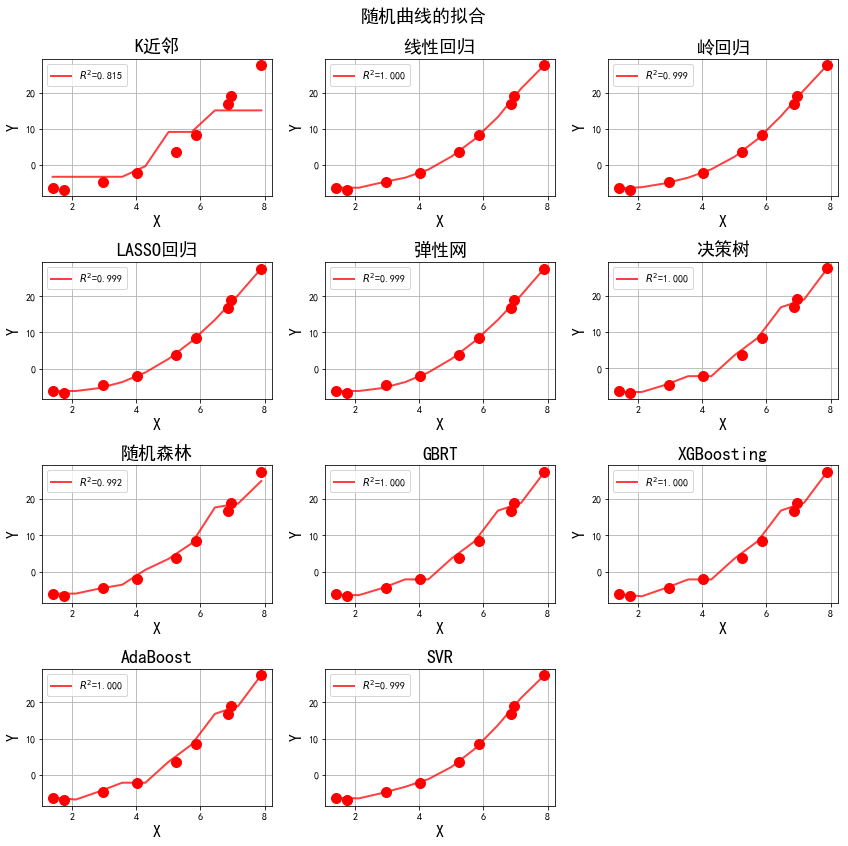

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn import svm
from sklearn import metrics
import xgboost as xgb

np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

modelList = [
        [KNeighborsRegressor(), 'K近邻'],
        [Pipeline([('poly', PolynomialFeatures(degree=7)),
                   ('linear', LinearRegression(fit_intercept=False))]), '线性回归'],
        [Pipeline([('poly', PolynomialFeatures(degree=5)),
                   ('linear', RidgeCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]), '岭回归'],
        [Pipeline([('poly', PolynomialFeatures(degree=6)),
                   ('linear', LassoCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]), 'LASSO回归'],
        [Pipeline([('poly', PolynomialFeatures(degree=6)),
                   ('linear', ElasticNetCV(alphas=np.logspace(-3, 2, 50),
                                           l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                                           fit_intercept=False))]), '弹性网'],
        [DecisionTreeRegressor(criterion='mse',max_depth=4), '决策树'],
        [RandomForestRegressor(n_estimators=10, max_depth=3), '随机森林'],
        [GradientBoostingRegressor(n_estimators=100, max_depth=1), 'GBRT'],
        [xgb.XGBRegressor(n_estimators=200, max_depth=4), 'XGBoosting'],
        [AdaBoostRegressor(n_estimators=100), 'AdaBoost'],
        [svm.SVR(kernel='rbf', gamma=0.2, C=100), 'SVR']
    ]

x_hat = np.linspace(x.min(), x.max(), num=10)
x_hat.shape = -1, 1
plt.figure(figsize=(12, 12), facecolor='w')

for i, clf in enumerate(modelList):
    model = clf[0]
    title = clf[1]
    model.fit(x, y)
    y_hat = model.predict(x_hat)
    
    plt.subplot(4, 3, i+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)
    
    y_pred = model.predict(x)
    r2 = metrics.r2_score(y, y_pred)
    
    label = u'$R^2$=%.3f' % (r2)
    plt.plot(x_hat, y_hat, color='r', lw=2, label=label, alpha=0.75)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title(title, fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)

plt.suptitle('随机曲线的拟合',fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()

#3 广告销量预测的曲线拟合

/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


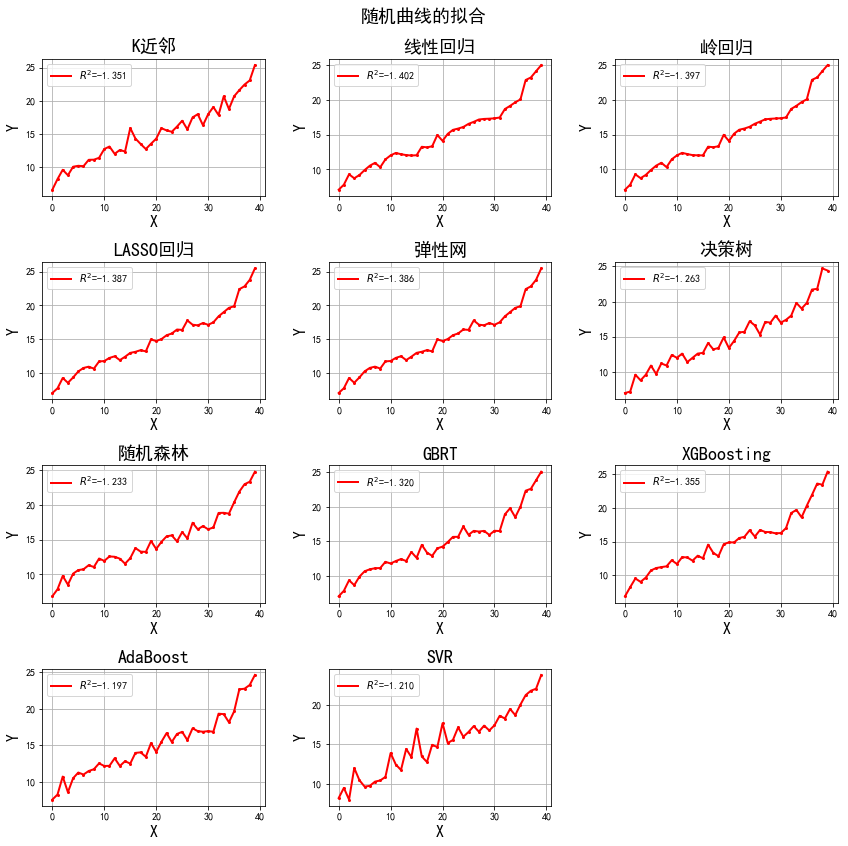

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn import svm
import pandas as pd
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Advertising.csv')
x = data[['TV', 'Radio']]
y = data['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

modelList = [
    [KNeighborsRegressor(), 'K近邻'],
    [Pipeline([('poly', PolynomialFeatures()),
               ('linear', LinearRegression(fit_intercept=False))]), '线性回归'],
    [Pipeline([('poly', PolynomialFeatures()),
               ('linear', RidgeCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]), '岭回归'],
    [Pipeline([('poly', PolynomialFeatures(degree=6)),
               ('linear', LassoCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))]), 'LASSO回归'],
    [Pipeline([('poly', PolynomialFeatures(degree=6)),
               ('linear', ElasticNetCV(alphas=np.logspace(-3, 2, 50),
                                       l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                                       fit_intercept=False))]), '弹性网'],
    [DecisionTreeRegressor(criterion='mse'), '决策树'],
    [RandomForestRegressor(n_estimators=10), '随机森林'],
    [GradientBoostingRegressor(n_estimators=100), 'GBRT'],
    [xgb.XGBRegressor(n_estimators=200, max_depth=4), 'XGBoosting'],
    [AdaBoostRegressor(n_estimators=100), 'AdaBoost'],
    [svm.SVR(kernel='linear'), 'SVR']
]

x_hat = np.arange(len(x_test))
# print(x_train)
plt.figure(figsize=(12, 12), facecolor='w')
order = y_test.argsort(axis=0)
x_test = x_test.values[order, :]
x_test = pd.DataFrame(x_test)
x_test.columns = ['TV', 'Radio']
# print(x_test)
for i, clf in enumerate(modelList):
    model = clf[0]
    title = clf[1]
    model.fit(x_train, y_train)
    
    y_hat = model.predict(x_test)

    plt.subplot(4, 3, i+1)
    plt.plot(x_hat, y_hat, 'ro', ms=2)

    r2 = model.score(x_test, y_test)

    label = u'$R^2$=%.3f' % (r2)
    plt.plot(x_hat, y_hat, 'r-',linewidth=2, label=label)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title(title, fontsize=18)
    plt.xlabel('X', fontsize=16)
    plt.ylabel('Y', fontsize=16)

plt.suptitle('随机曲线的拟合',fontsize=18)
plt.tight_layout(1.5)
plt.subplots_adjust(top=0.92)
plt.show()